In [9]:
# import matplotlib
import numpy as np
import pandas as pd
from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from pc_viz.connecting_line import conn_lines

In [10]:
def multi_cept(index_list, x_pt):
    try:
        newid = index_list[0]
        diff_p = abs(newid - x_pt)
        if len(index_list) > 1:
            for _ in index_list:
                diff_n = abs(_ - x_pt)
                if diff_n  <  diff_p :
                    newid = _
                    diff_p = diff_n
        return newid
    except TypeError:
        return index_list

In [11]:
df = pd.read_excel('data/finished plan data.xlsx')
df_t = pd.read_excel('data/result of sea trial.xlsx')
connector_color = 'magenta'
lwidth = 2
marker_size = 100

In [12]:
def smoothing(x, y):
    
    X_Y_Spline = make_interp_spline(x, y)
    X_ = np.linspace(x.min(), x.max(), 500)
    Y_ = X_Y_Spline(X_)
    
    return X_, Y_

**Smoothing**

In [13]:
x0 = df['Engine Output (%)']
Te1_ = df['Te1']
x, Te1 = smoothing(x0, Te1_)

Tc_ = df['Tc']
_, Tc = smoothing(x0, Tc_)

Te2_ = df['Te2']
_, Te2 = smoothing(x0, Te2_)

Ps_ = df['Ps']
_, Ps = smoothing(x0, Ps_)

Pm_ = df['Pm']
_, Pm = smoothing(x0, Pm_)

Pc_ = df['Pc']
_, Pc = smoothing(x0, Pc_)

Ne_ = df['Ne']
_, Ne = smoothing(x0, Ne_)

Nb_ = df['Nb']
_, Nb = smoothing(x0, Nb_)

Be_ = df['Be']
_, Be = smoothing(x0, Be_)

Rc_ = df['Rc']
_, Rc = smoothing(x0, Rc_)

[] -1 50
[160] [160] 70
[304] [304] 85
[452 492] [452 492] 100


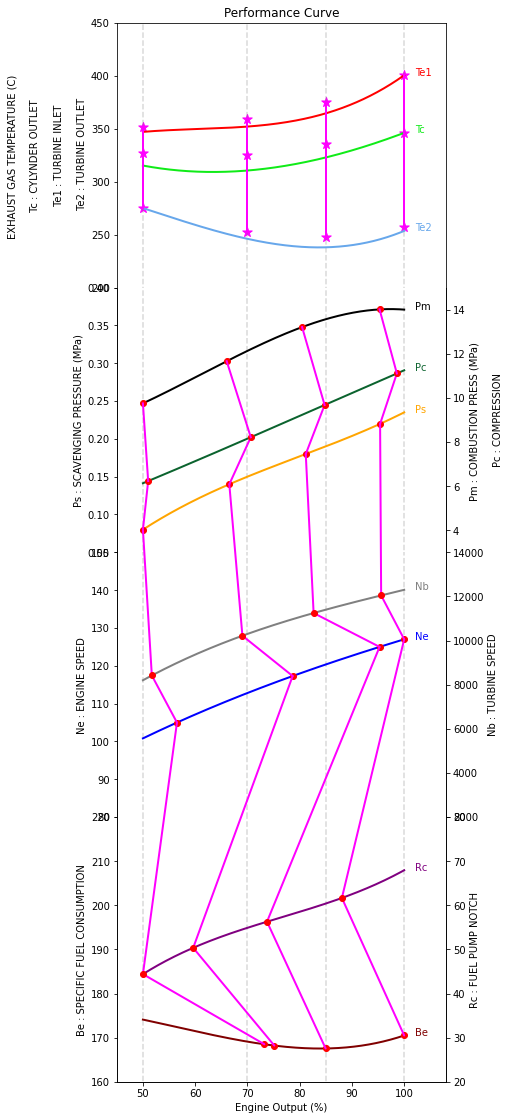

In [14]:
x_pt = 100
fig, ax = plt.subplots(4, 1, figsize=(5,15), gridspec_kw=dict(hspace=0))
fig.tight_layout(pad=0)

ax1t = ax[1].twinx()
ax2t = ax[2].twinx()
ax3t = ax[3].twinx()
ax_t = {1 : (1, ax1t), 2 : (2, ax2t), 3: (3, ax3t)}

# ======================================= GARIS LAYOUT PUTUS-PUTUS

ax[0].plot([50, 50], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[1].plot([50, 50], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[2].plot([50, 50], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[3].plot([50, 50], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[0].plot([70, 70], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[1].plot([70, 70], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[2].plot([70, 70], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[3].plot([70, 70], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[0].plot([85, 85], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[1].plot([85, 85], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[2].plot([85, 85], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[3].plot([85, 85], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[0].plot([100, 100], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[1].plot([100, 100], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[2].plot([100, 100], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[3].plot([100, 100], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')


ax[0].set_title('Performance Curve'.format(x_pt))
ax[3].set_xlabel('Engine Output (%)')

# ====================================== Frame/ spines visibility
ax[0].spines.bottom.set_visible(False)
ax[1].spines.top.set_visible(False)
ax[1].spines.bottom.set_visible(False)
ax1t.spines.top.set_visible(False)
ax1t.spines.bottom.set_visible(False)
ax[2].spines.top.set_visible(False)
ax[2].spines.bottom.set_visible(False)
ax2t.spines.top.set_visible(False)
ax2t.spines.bottom.set_visible(False)
ax[3].spines.top.set_visible(False)
ax3t.spines.top.set_visible(False)
    
# ================== LINES
ax[0].plot(x, Te1,
           label = 'Te1',
           linewidth = lwidth,
           color = '#ff0000')
ax[0].plot(x, Tc,
           label = 'Tc',
           linewidth = lwidth,
           color = '#10eb18')
ax[0].plot(x,  Te2,
           label = 'Te2',
           linewidth = lwidth,
           color = '#67a7eb')
ax[1].plot(x, Ps,
           label = 'Ps',
           linewidth = lwidth,
           color='orange')
ax1t.plot(x, Pc,
          label = 'Pc',
          linewidth = lwidth,
          color = '#0b632e')
ax1t.plot(x, Pm,
          label = 'Pm',
          linewidth = lwidth,
          color = 'black')
ax[2].plot(x, Ne,
           label = 'Ne',
           linewidth = lwidth,
           color = 'blue')
ax2t.plot(x, Nb,
          label = 'Nb',
          linewidth = lwidth,
          color = 'grey')
ax[3].plot(x, Be,
           label = 'Be',
           linewidth = lwidth,
           color = 'maroon')
ax3t.plot(x, Rc,
          label = 'Rc',
          linewidth = lwidth,
          color = 'purple')

ax[0].set_ylim([200, 450])
ax[1].set_ylim([0.05, 0.4])
ax1t.set_ylim([3, 15])
ax[2].set_ylim([80, 150])
ax2t.set_ylim([2000, 14000])
ax[3].set_ylim([160, 220])
ax3t.set_ylim([20, 80])
ax[0].set_xlim([45, 108])
ax[1].set_xlim([45, 108])
ax1t.set_xlim([45, 108])
ax[2].set_xlim([45, 108])
ax2t.set_xlim([45, 108])
ax[3].set_xlim([45, 108])
ax3t.set_xlim([45, 108])


# ======================================= Y-AXIS LABELS
ax[0].set_ylabel("""EXHAUST GAS TEMPERATURE (C) \n 
 Tc : CYLYNDER OUTLET \n
 Te1 : TURBINE INLET \n
 Te2 : TURBINE OUTLET""")
ax[1].set_ylabel('Ps : SCAVENGING PRESSURE (MPa)')
ax1t.set_ylabel("""Pm : COMBUSTION PRESS (MPa) \n
Pc : COMPRESSION""")
ax[2].set_ylabel('Ne : ENGINE SPEED')
ax2t.set_ylabel('Nb : TURBINE SPEED')
ax[3].set_ylabel('Be : SPECIFIC FUEL CONSUMPTION')
ax3t.set_ylabel('Rc : FUEL PUMP NOTCH')

for x_ptl in [50, 70, 85, 100]:
  conn_lines(Te1, Te2, Tc, Ps, Pc, Pm, Ne, Nb, Rc, Be, df, df_t, x_ptl, 
  multi_cept, ax, ax1t, x, ax2t, ax3t, lwidth, connector_color)


# ========================= ANOTATED LEGEND
ax[0].annotate('Te1',
  xy     = (     x[-1], Te1[-1]),
  xytext = (1.02*x[-1], Te1[-1]),
  color  = '#ff0000',
)
ax[0].annotate('Tc',
  xy     = (     x[-1], Tc[-1]),
  xytext = (1.02*x[-1], Tc[-1]),
  color  = '#10eb18',
)
ax[0].annotate('Te2',
  xy     = (     x[-1], Te2[-1]),
  xytext = (1.02*x[-1], Te2[-1]),
  color  = '#67a7eb',
)
ax[1].annotate('Ps',
  xy     = (     x[-1], Ps[-1]),
  xytext = (1.02*x[-1], Ps[-1]),
  color  = 'orange',
)
ax1t.annotate('Pc',
  xy     = (     x[-1], Pc[-1]),
  xytext = (1.02*x[-1], Pc[-1]),
  color  = '#0b632e',
)
ax1t.annotate('Pm',
  xy     = (     x[-1], Pm[-1]),
  xytext = (1.02*x[-1], Pm[-1]),
  color  = 'black',
)
ax[2].annotate('Ne',
  xy     = (     x[-1], Ne[-1]),
  xytext = (1.02*x[-1], Ne[-1]),
  color  = 'blue',
)
ax2t.annotate('Nb',
  xy     = (     x[-1], Nb[-1]),
  xytext = (1.02*x[-1], Nb[-1]),
  color  = 'grey',
)
ax[3].annotate('Be',
  xy     = (     x[-1], Be[-1]),
  xytext = (1.02*x[-1], Be[-1]),
  color  = 'maroon',
)
ax3t.annotate('Rc',
  xy     = (     x[-1], Rc[-1]),
  xytext = (1.02*x[-1], Rc[-1]),
  color  = 'purple',
)





plt.show()

In [15]:
fig.savefig('outputs/Curve_comp.png'.format(x_pt), bbox_inches="tight")